In [67]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from arch import arch_model
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [84]:
def arch_model(returns, alpha):
    n = len(returns)
    variances = np.zeros(n)
    variances[0] = np.var(returns)

    for t in range(1, n):
        variances[t] = alpha * returns[t-1]**2 + (1 - alpha) * variances[t-1]

    return variances

In [96]:
# Step 1: Download Apple stock data from Yahoo Finance
stock = yf.download('NVTA', start='2023-01-01', end='2023-11-04')

# Step 2: Extract the daily returns from the stock data
returns = stock['Adj Close'].pct_change().dropna().values

# Step 3: Estimate ARCH(1) model
alpha = 0.05  # ARCH parameter
volatility = arch_model(returns, alpha)

# Step 4: Generate volatility forecasts
forecast_length = 30
last_return = returns[-1]
forecast_returns = np.array([last_return] * forecast_length)
forecast_volatility = arch_model(forecast_returns, alpha)

# Step 5: Combine historical and forecasted volatility
volatility = np.concatenate([volatility, forecast_volatility])

[*********************100%%**********************]  1 of 1 completed


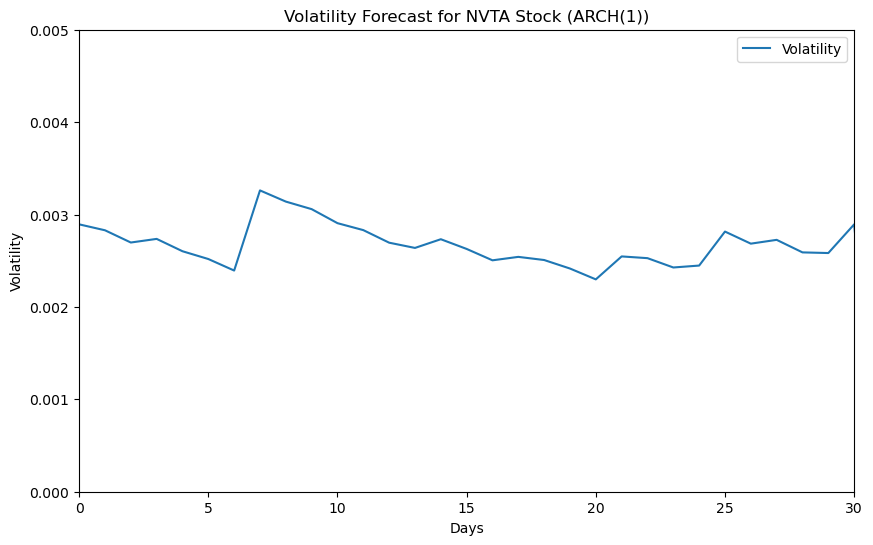

In [83]:
# Step 6: Visualize the volatility
plt.figure(figsize=(10, 6))
plt.plot(volatility[-(forecast_length+31):], label='Volatility')
plt.xlabel('Days')
plt.ylabel('Volatility')
plt.title('Volatility Forecast for NVTA Stock (ARCH(1))')
plt.xlim((0,30))
plt.ylim((0,0.005))
plt.legend()
plt.show()

In [71]:
volatility

array([3.25073948e-03, 3.20782657e-03, 3.05951608e-03, 3.01872873e-03,
       3.08117033e-03, 2.92711182e-03, 3.53280462e-03, 3.37028783e-03,
       3.43553804e-03, 3.42056137e-03, 3.27535990e-03, 3.30388769e-03,
       3.28297961e-03, 3.36796578e-03, 3.26665534e-03, 3.13874323e-03,
       3.05809987e-03, 2.95807336e-03, 2.83806969e-03, 2.81323200e-03,
       2.69501384e-03, 3.23518247e-03, 3.10728153e-03, 3.05680625e-03,
       2.90716594e-03, 2.94472280e-03, 2.90892708e-03, 2.96232851e-03,
       2.81883486e-03, 2.72030986e-03, 2.98929466e-03, 2.84403832e-03,
       2.70596863e-03, 3.03464643e-03, 2.98727115e-03, 2.84262056e-03,
       2.89580167e-03, 2.81544276e-03, 2.88175853e-03, 5.12707157e-03,
       5.21794076e-03, 4.97062901e-03, 5.14430391e-03, 4.90303257e-03,
       4.68726564e-03, 4.54742046e-03, 4.67634897e-03, 4.60348940e-03,
       4.42961859e-03, 4.24671806e-03, 4.03693318e-03, 4.00070959e-03,
       4.09203190e-03, 4.30065352e-03, 4.26927576e-03, 4.10784101e-03,
      

In [72]:
from arch import arch_model
import datetime as dt
import pandas_datareader.data as web
start = dt.datetime(2023,1,1)
end = dt.datetime(2023,11,4)
#sp500 = web.get_data_yahoo('^GSPC', start=start, end=end)
sp500 = pdr.get_data_yahoo('NVTA', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns, vol='Garch', p=1, o=0, q=1, dist='Normal')

[*********************100%%**********************]  1 of 1 completed


In [73]:
split_date = dt.datetime(2023,10,1)
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 592.3017106612509
Iteration:      2,   Func. Count:     13,   Neg. LLF: 588.6785364866494
Iteration:      3,   Func. Count:     19,   Neg. LLF: 588.6766043351447
Iteration:      4,   Func. Count:     25,   Neg. LLF: 588.6649793938358
Iteration:      5,   Func. Count:     31,   Neg. LLF: 588.6613495635595
Iteration:      6,   Func. Count:     36,   Neg. LLF: 588.6613432910619
Iteration:      7,   Func. Count:     41,   Neg. LLF: 588.6613030182134
Iteration:      8,   Func. Count:     46,   Neg. LLF: 588.6611988262082
Iteration:      9,   Func. Count:     51,   Neg. LLF: 588.6609236218604
Iteration:     10,   Func. Count:     56,   Neg. LLF: 588.6598286390215
Iteration:     11,   Func. Count:     61,   Neg. LLF: 588.6367305283206
Iteration:     12,   Func. Count:     66,   Neg. LLF: 588.580129618371
Iteration:     13,   Func. Count:     71,   Neg. LLF: 588.5709404860461
Iteration:     14,   Func. Count:     76,   Neg. LLF: 588.5505068

<Axes: xlabel='Date'>

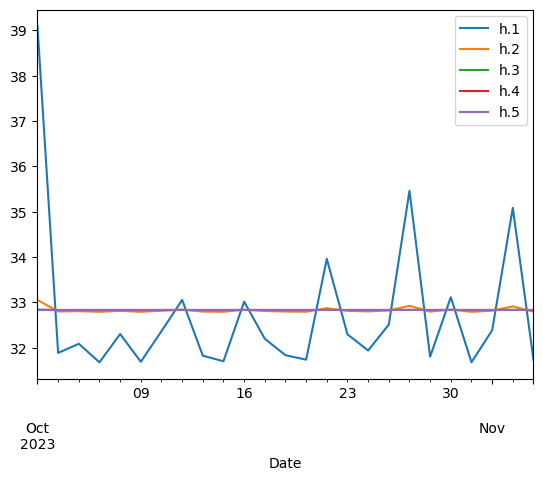

In [74]:
forecasts = res.forecast(horizon=5, start=split_date)
forecasts.variance[split_date:].plot()

In [75]:
forecasts = res.forecast(horizon=5, start=split_date, method='simulation')

In [76]:
print(forecasts.variance.tail())

                  h.1        h.2        h.3        h.4        h.5
Date                                                             
2023-10-30  33.113667  32.859261  32.797140  32.672673  32.799139
2023-10-31  31.677353  32.874693  32.836380  32.815116  32.898445
2023-11-01  32.383009  32.813819  32.864551  32.829227  32.829175
2023-11-02  35.084557  32.946688  32.859244  32.741094  32.852903
2023-11-03  31.732724  32.790454  32.764994  32.832062  32.866629


In [77]:
day = dt.timedelta(1)
print(forecasts.variance[split_date - 5 * day:split_date + 5 * day])

                  h.1        h.2        h.3        h.4        h.5
Date                                                             
2023-10-02  39.089657  33.190986  32.828799  32.807305  32.759427
2023-10-03  31.884269  32.736291  32.808022  32.818611  32.790987
2023-10-04  32.086012  32.782821  32.760980  32.827343  32.800409
2023-10-05  31.676665  32.769110  32.796924  32.809991  32.820339
2023-10-06  32.300896  32.890798  32.811355  32.858578  32.763095


In [129]:
import datetime as dt

import pandas_datareader.data as web

from arch import arch_model

start = dt.datetime(2022, 1, 1)
end = dt.datetime(2023, 11, 2)
#sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
sp500 = pdr.get_data_yahoo('TWLO', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns)

[*********************100%%**********************]  1 of 1 completed


In [130]:
res = am.fit(disp="off")

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1435.3391717590748
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1479.886678331797
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1324.951852863903
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1316.633224478225
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1317.3469321665393
Iteration:      6,   Func. Count:     36,   Neg. LLF: 1329.3765029241617
Iteration:      7,   Func. Count:     43,   Neg. LLF: 1316.547968742665
Iteration:      8,   Func. Count:     48,   Neg. LLF: 1316.5473484265842
Iteration:      9,   Func. Count:     53,   Neg. LLF: 1316.5472404417883
Iteration:     10,   Func. Count:     57,   Neg. LLF: 1316.547240442008
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1316.5472404417883
            Iterations: 10
            Function evaluations: 57
            Gradient evaluations: 10


In [131]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1316.55
Distribution:                  Normal   AIC:                           2641.09
Method:            Maximum Likelihood   BIC:                           2657.62
                                        No. Observations:                  460
Date:                Sun, Nov 05 2023   Df Residuals:                      459
Time:                        10:06:04   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.2775      0.178     -1.555      0.120 [ -0.627,

In [135]:
split_date = dt.datetime(2023,10,20)
res = am.fit(last_obs=split_date, disp="off")

In [133]:
forecasts = res.forecast(horizon=5, start=split_date, method='bootstrap')
#forecasts.variance[split_date:].plot()
forecasts.variance[split_date:]

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2023-10-20,10.706284,12.003110,13.356707,14.331861,15.255731
2023-10-23,9.509292,10.366258,11.486656,12.620930,13.884193
2023-10-24,9.600325,10.630725,11.569439,12.484232,14.056240
2023-10-25,12.683392,13.800696,14.905940,16.226294,16.498740
2023-10-26,10.636283,11.940800,12.631218,13.444483,14.491313
2023-10-27,9.204877,10.186576,11.264913,12.305072,13.373529
2023-10-30,8.084031,8.869406,9.922262,10.635327,11.405695
2023-10-31,8.056620,8.892786,9.651616,10.649180,11.236826
2023-11-01,7.511929,8.572629,9.565377,10.459644,11.222999


long_df: (45, 3)


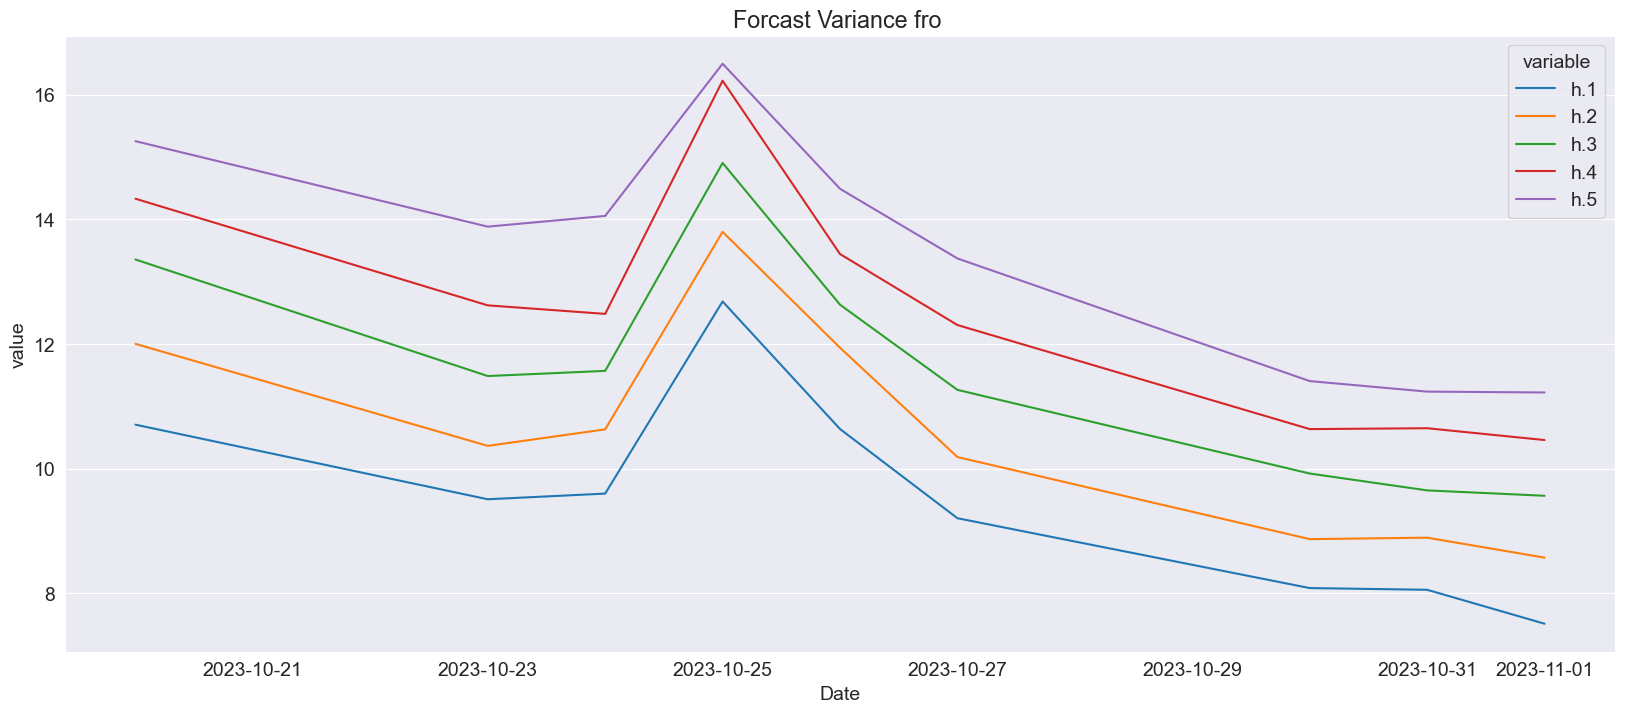

In [134]:
# Long 
long_df = forecasts.variance[split_date:]
long_df.reset_index(inplace=True)
long_df = long_df.melt(id_vars=['Date'])
print('long_df:', long_df.shape)

# Graph
fig, ax = plt.subplots(figsize=(20,8))
ax.xaxis.grid()

g = sns.lineplot(x = 'Date', y = 'value', data=long_df, hue='variable')
#g.set(xlim = (30,32))
plt.ticklabel_format(style='plain', axis='y')
ax.set(title='Forcast Variance fro ');